In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('iou_zipcodes_2019.csv')


In [3]:

# Análise exploratória
print(df.head())  # Exibir as primeiras linhas do DataFrame
print(df.info())  # Obter informações sobre as colunas e tipos de dados

     zip  eiaid        utility_name state service_type       ownership   
0  85321    176  Ajo Improvement Co    AZ      Bundled  Investor Owned  \
1  36560    195    Alabama Power Co    AL      Bundled  Investor Owned   
2  36513    195    Alabama Power Co    AL      Bundled  Investor Owned   
3  36280    195    Alabama Power Co    AL      Bundled  Investor Owned   
4  35473    195    Alabama Power Co    AL      Bundled  Investor Owned   

   comm_rate  ind_rate  res_rate  
0   0.096414  0.000000  0.106572  
1   0.120772  0.062883  0.134070  
2   0.120772  0.062883  0.134070  
3   0.120772  0.062883  0.134070  
4   0.120772  0.062883  0.134070  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52246 entries, 0 to 52245
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zip           52246 non-null  int64  
 1   eiaid         52246 non-null  int64  
 2   utility_name  52246 non-null  object 
 3   state         522

In [4]:
# Estatísticas descritivas
print(df.describe())  # Resumo estatístico das colunas numéricas

                zip         eiaid     comm_rate      ind_rate      res_rate
count  52246.000000  52246.000000  52246.000000  52246.000000  52246.000000
mean   42525.083432  13902.693374      0.090114      0.063188      0.114093
std    29162.747474  11444.989275      0.047997      0.044356      0.051801
min     1002.000000    176.000000      0.000000      0.000000      0.000000
25%    16695.000000   5860.000000      0.062967      0.037961      0.089627
50%    40163.500000  13781.000000      0.091683      0.063744      0.113862
75%    62423.750000  15477.000000      0.112284      0.079018      0.135224
max    99950.000000  57483.000000      1.053957      0.347239      1.096154


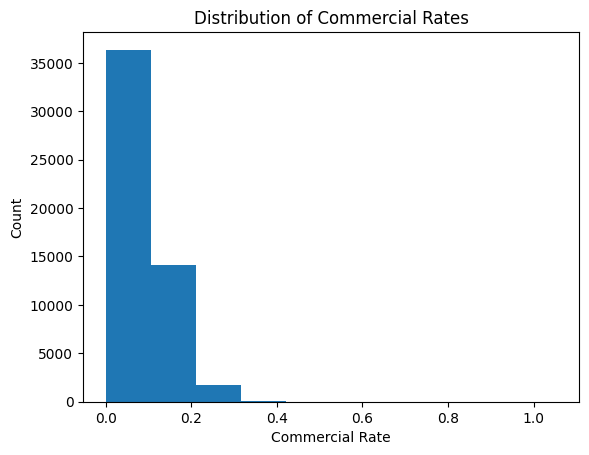

In [5]:
# Visualização de dados
df['comm_rate'].plot.hist()  # Exemplo de histograma para a coluna 'comm_rate'
plt.xlabel('Commercial Rate')
plt.ylabel('Count')
plt.title('Distribution of Commercial Rates')
plt.show()

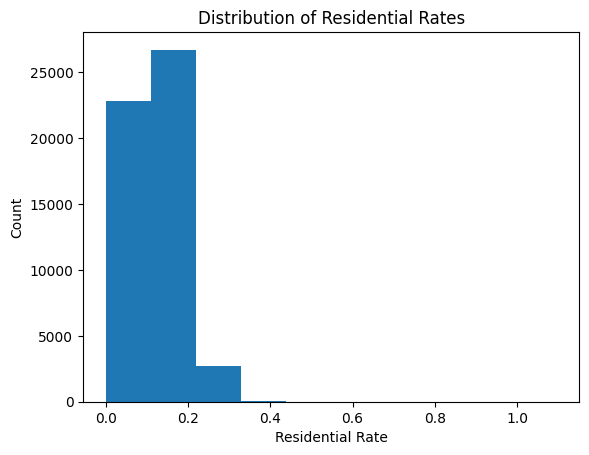

In [6]:
# Visualização de dados
df['res_rate'].plot.hist()  # Exemplo de histograma para a coluna 'res_rate'
plt.xlabel('Residential Rate')
plt.ylabel('Count')
plt.title('Distribution of Residential Rates')
plt.show()

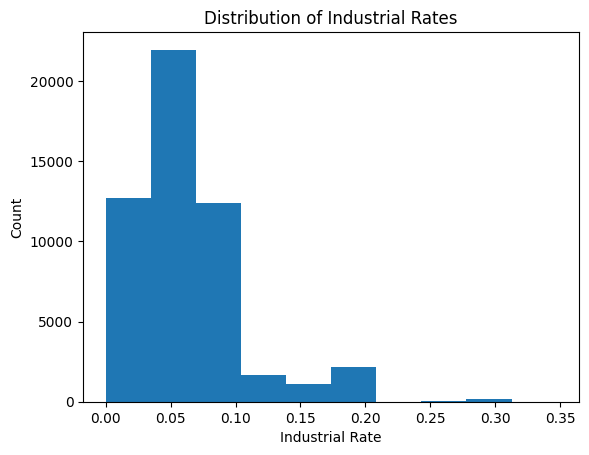

In [7]:
# Visualização de dados
df['ind_rate'].plot.hist()  # Exemplo de histograma para a coluna 'reg_rate'
plt.xlabel('Industrial Rate')
plt.ylabel('Count')
plt.title('Distribution of Industrial Rates')
plt.show()

In [8]:
# Segmentação e agregação
drop_col = ['utility_name', 'service_type', 'ownership', 'zip', 'eiaid']
df2 = df.drop(drop_col, axis=1)
state_grouped = df2.groupby('state').mean()  # Calcular a média das taxas por estado
print(state_grouped)

       comm_rate  ind_rate  res_rate
state                               
AK      0.338872  0.029715  0.391413
AL      0.120772  0.062883  0.134070
AR      0.087455  0.064325  0.095987
AZ      0.110113  0.077984  0.128243
CA      0.149917  0.109646  0.168963
CO      0.098944  0.067443  0.120086
CT      0.130553  0.118268  0.173055
DC      0.090921  0.007736  0.084029
DE      0.069034  0.045241  0.089368
FL      0.094054  0.073010  0.120648
GA      0.096497  0.058858  0.120972
HI      0.308571  0.268049  0.329761
IA      0.106776  0.069231  0.138637
ID      0.080459  0.059283  0.099911
IL      0.058605  0.032720  0.084257
IN      0.110537  0.075471  0.127806
KS      0.100601  0.080200  0.126669
KY      0.106304  0.064367  0.108355
LA      0.092160  0.062692  0.102075
MA      0.120259  0.125336  0.173130
MD      0.076800  0.057247  0.092155
ME      0.101229  0.081422  0.130420
MI      0.072672  0.041847  0.090344
MN      0.100720  0.072329  0.126570
MO      0.089560  0.069631  0.112602
M

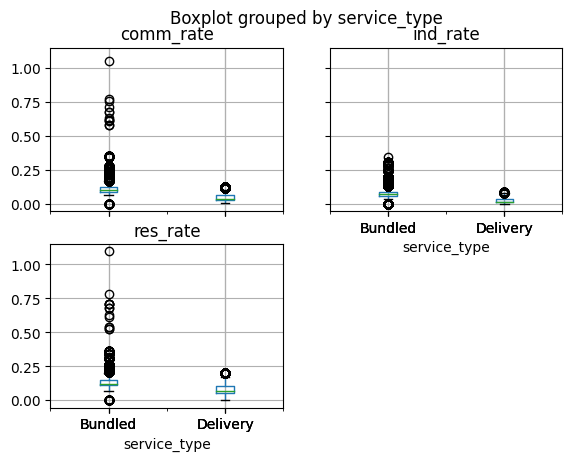

In [9]:
# Análise comparativa
df.boxplot(column=['comm_rate', 'ind_rate', 'res_rate'], by='service_type')
plt.xlabel('Service Type')
plt.ylabel('Rate')
plt.title('Comparison of Rates by Service Type')
plt.show()

In [10]:
highest_rates = state_grouped['res_rate'].nlargest(5)
lowres_rates = state_grouped['res_rate'].nsmallest(5)
print('States with highest average residential rates:')
print(highest_rates)
print('States with lowest average residential rates:')
print(lowres_rates)

States with highest average residential rates:
state
AK    0.391413
HI    0.329761
VT    0.176544
MA    0.173130
CT    0.173055
Name: res_rate, dtype: float64
States with lowest average residential rates:
state
OR    0.058656
NV    0.058794
VA    0.059247
WA    0.063490
DC    0.084029
Name: res_rate, dtype: float64


In [11]:
# Comparação entre empresas de serviços públicos
drop_col = ['state', 'service_type', 'ownership', 'zip', 'eiaid']
df3 = df.drop(drop_col, axis=1)
utility_grouped = df3.groupby('utility_name').mean()  # Calcular a média das taxas por empresa
print(utility_grouped)

                                comm_rate  ind_rate  res_rate
utility_name                                                 
ALLETE, Inc.                     0.101669  0.065258  0.110807
Ajo Improvement Co               0.096414  0.000000  0.106572
Alabama Power Co                 0.120772  0.062883  0.134070
Alaska Electric Light&Power Co   0.120420  0.120027  0.141818
Alaska Power and Telephone Co    0.257169  0.000000  0.302579
...                                   ...       ...       ...
Westfield Electric Company       0.154726  0.152768  0.151122
Wheeling Power Co                0.091602  0.055008  0.122660
Wisconsin Electric Power Co      0.098107  0.078902  0.129730
Wisconsin Power & Light Co       0.110966  0.076611  0.136593
Wisconsin Public Service Corp    0.091267  0.057833  0.129293

[153 rows x 3 columns]


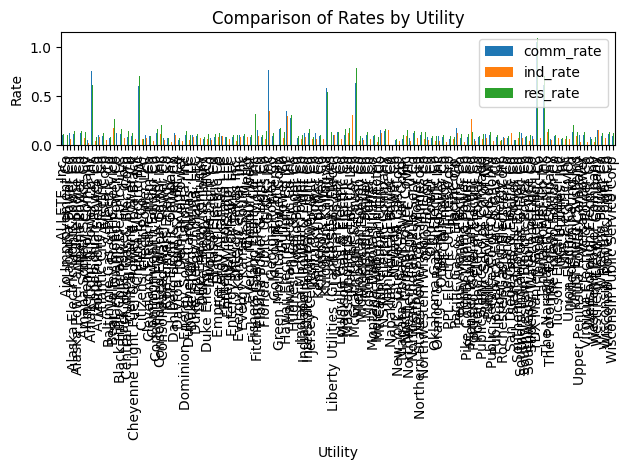

In [12]:
# Criar o gráfico de barras
utility_grouped.plot.bar()
plt.xlabel('Utility')
plt.ylabel('Rate')
plt.title('Comparison of Rates by Utility')
plt.legend()

# Ajustar o layout para evitar que as legendas se sobreponham
plt.tight_layout()

# Exibir o gráfico (estou tentando encontrar uma maneira melhor de plotá-lo)
plt.show()

In [13]:
# Análise de correlação entre as taxas
correlation = df[['comm_rate', 'ind_rate', 'res_rate']].corr()
print(correlation)


           comm_rate  ind_rate  res_rate
comm_rate   1.000000  0.875207  0.919321
ind_rate    0.875207  1.000000  0.819633
res_rate    0.919321  0.819633  1.000000


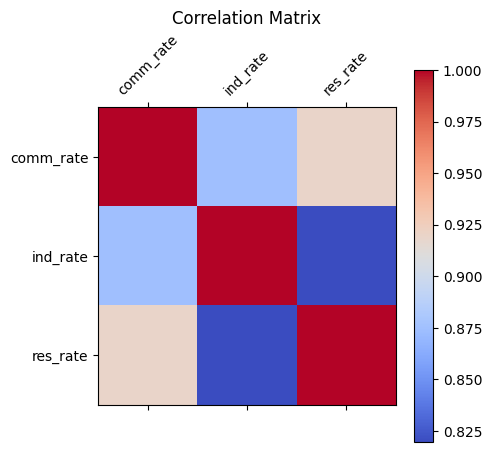

In [14]:

# Visualização da matriz de correlação
plt.matshow(correlation, cmap='coolwarm')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

C:\Users\kirit\AppData\Local\Temp\ipykernel_3368\3563057618.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


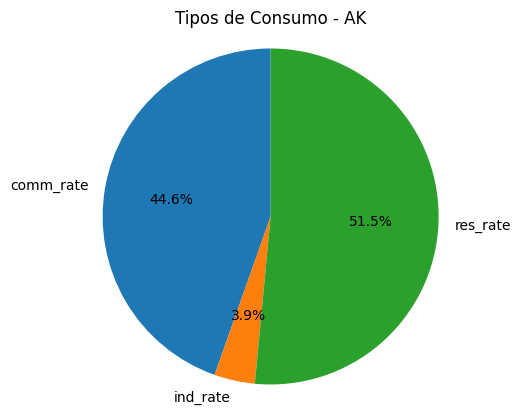

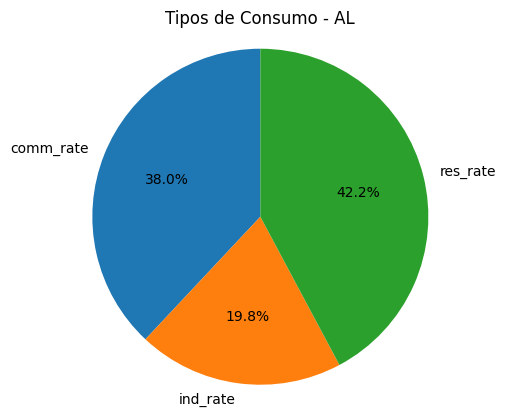

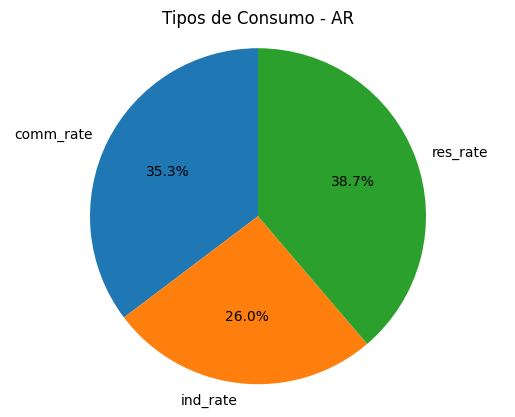

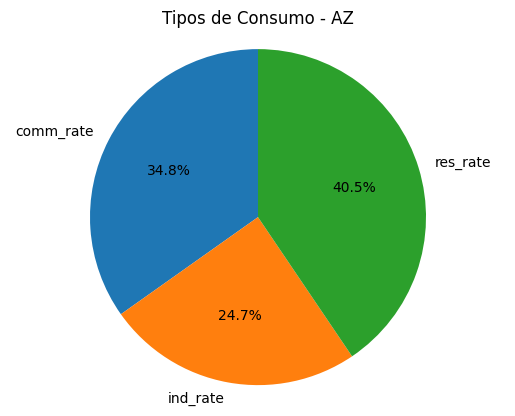

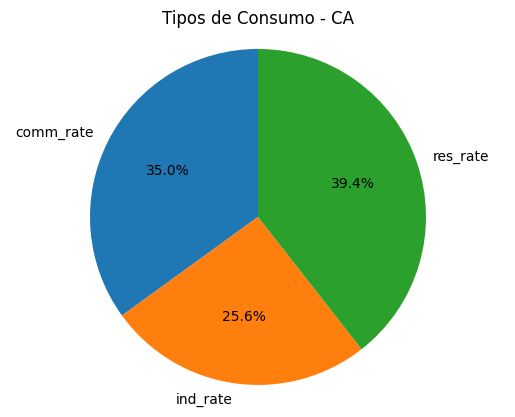

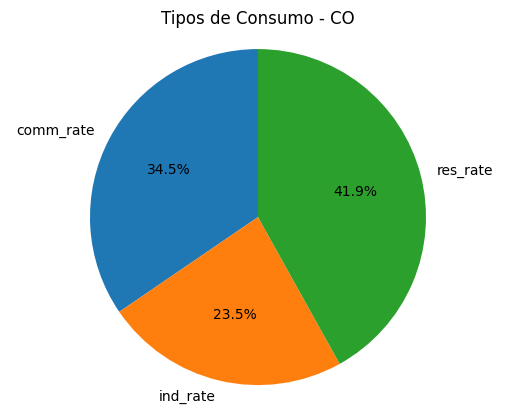

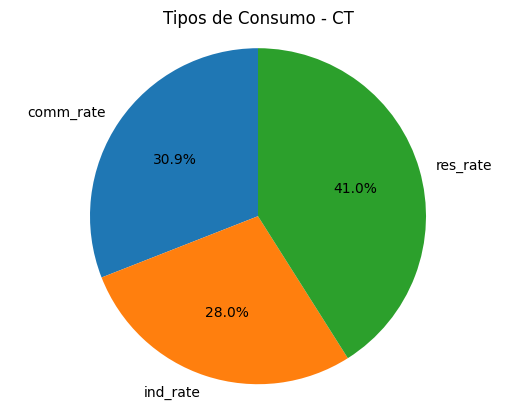

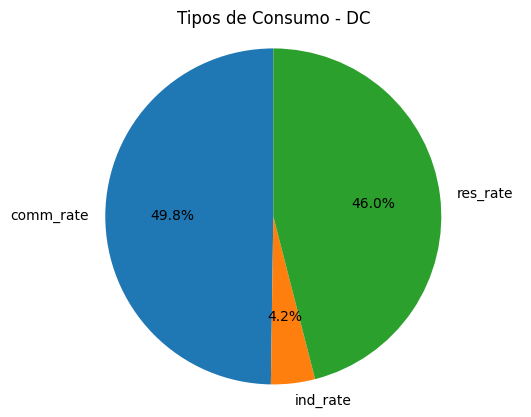

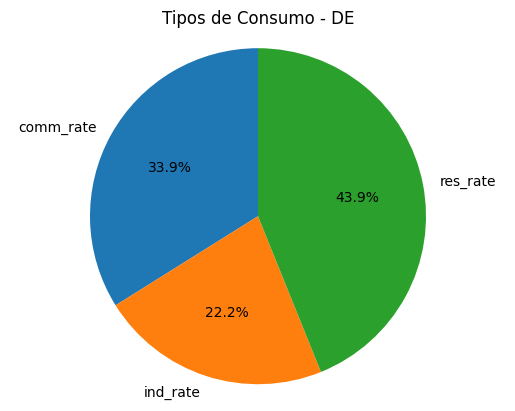

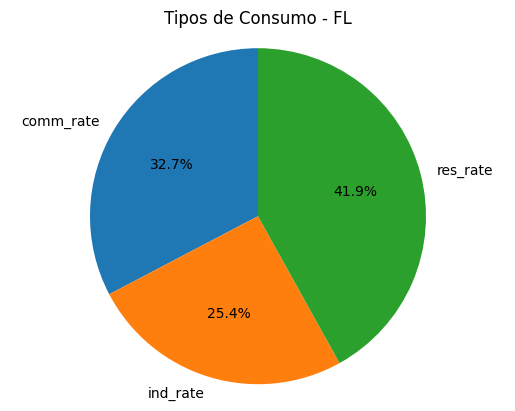

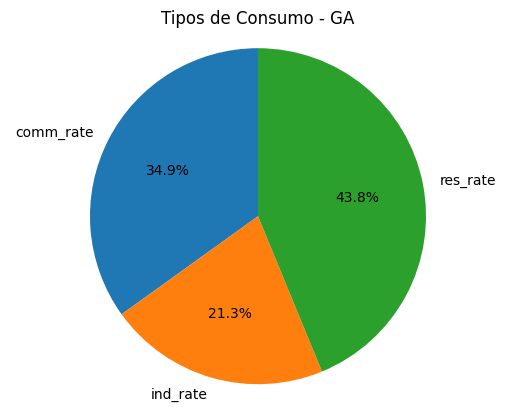

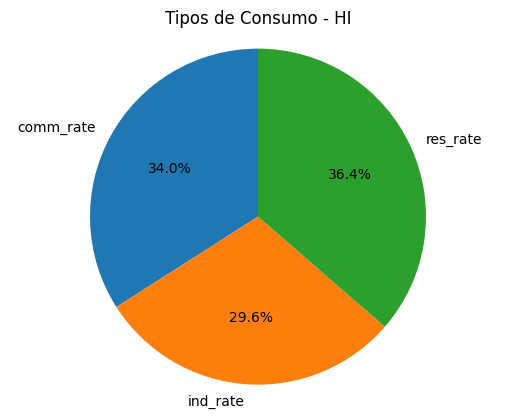

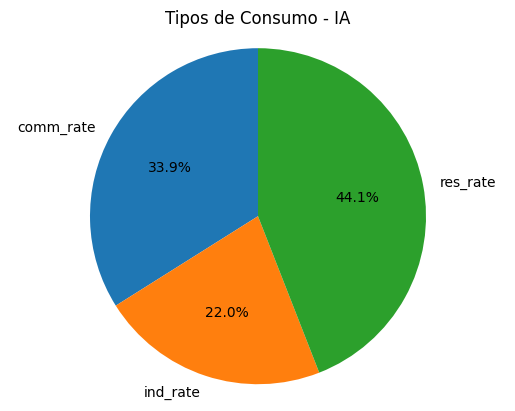

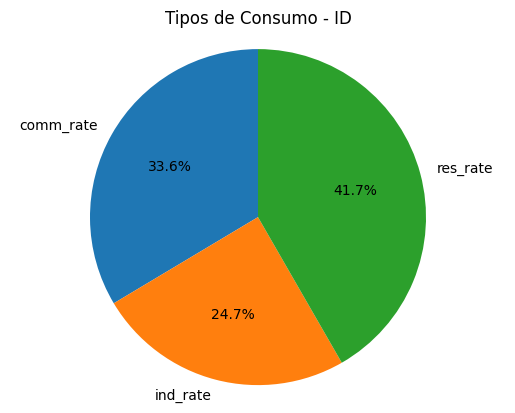

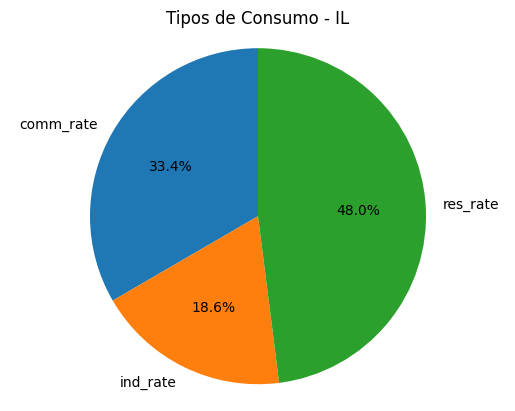

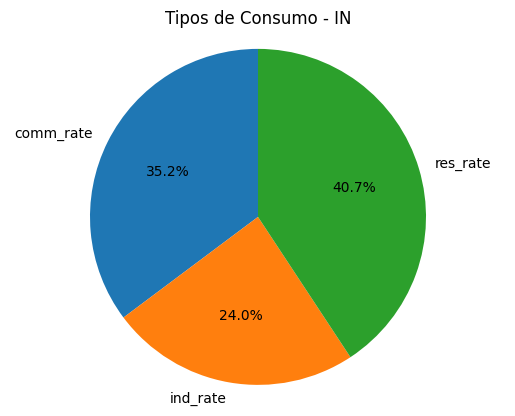

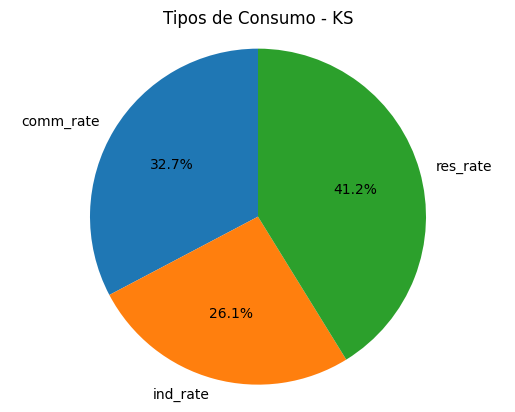

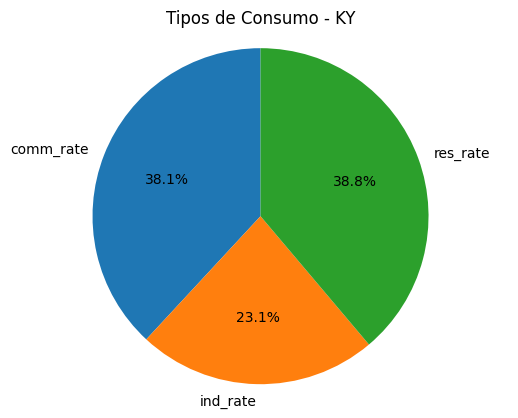

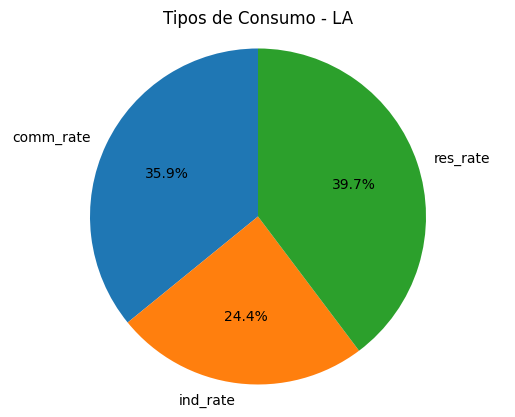

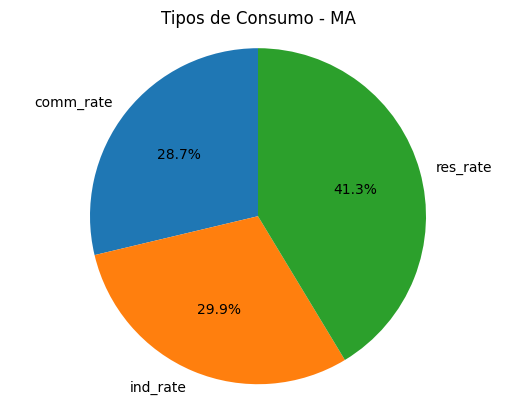

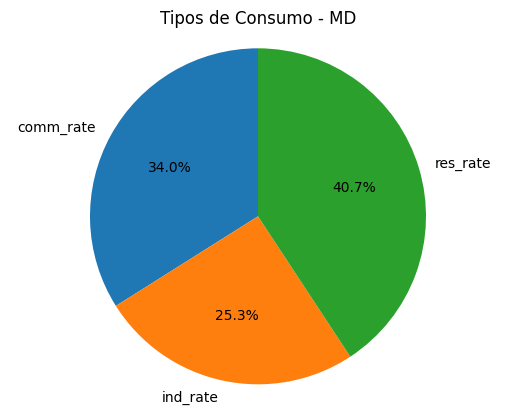

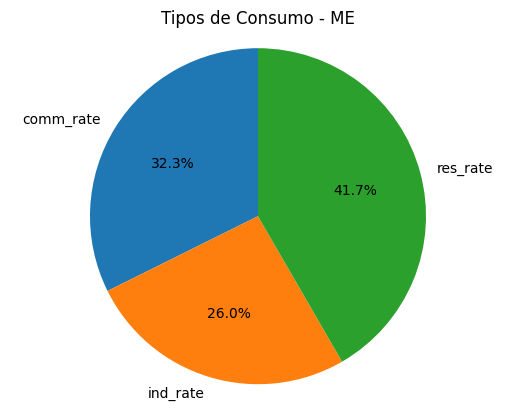

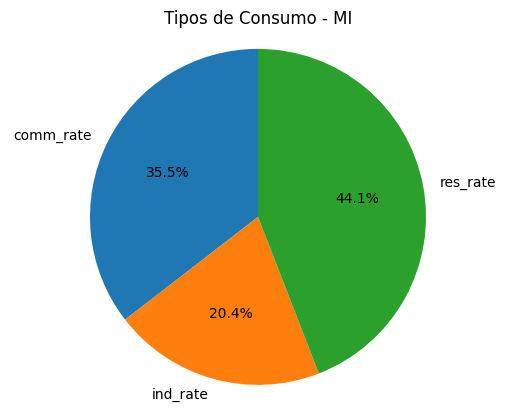

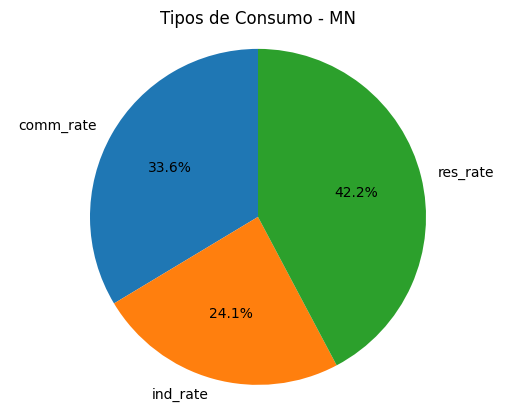

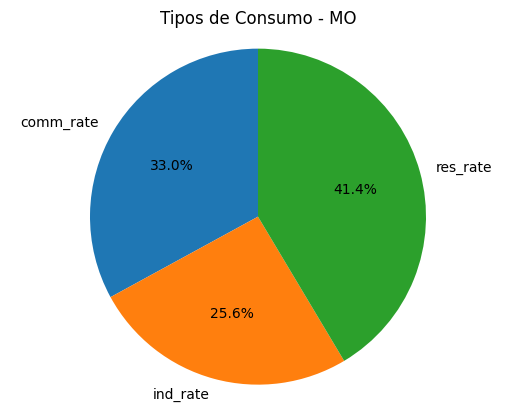

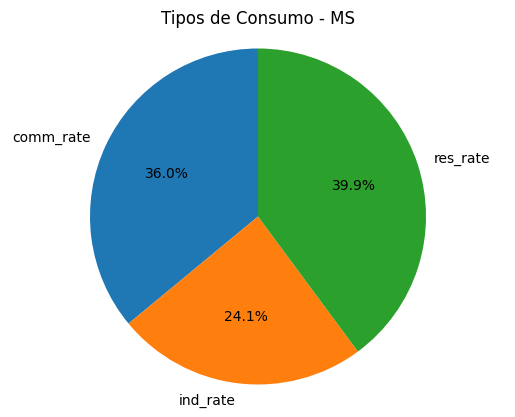

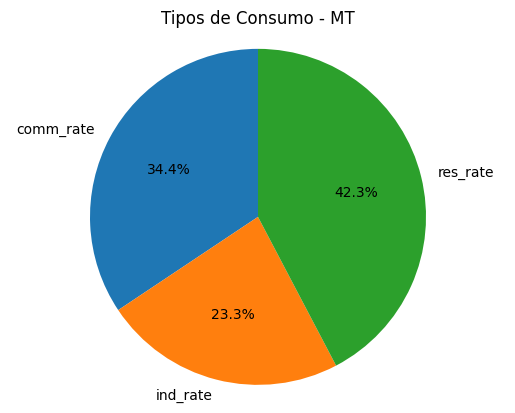

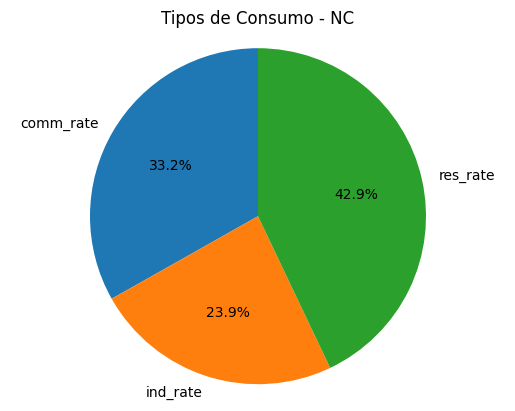

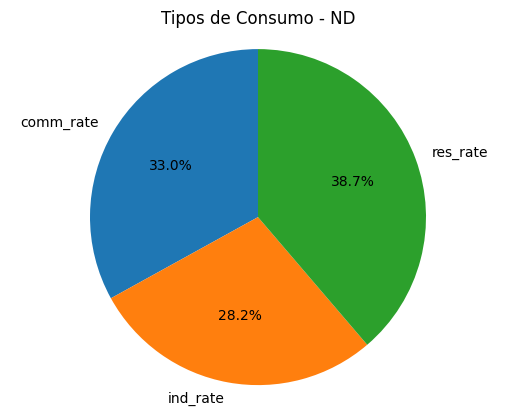

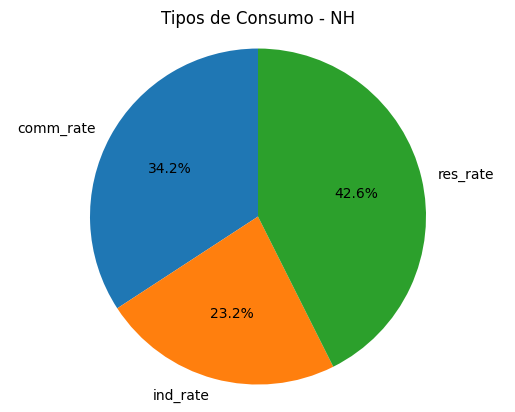

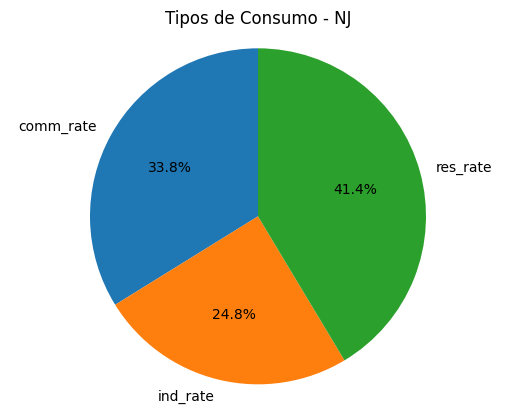

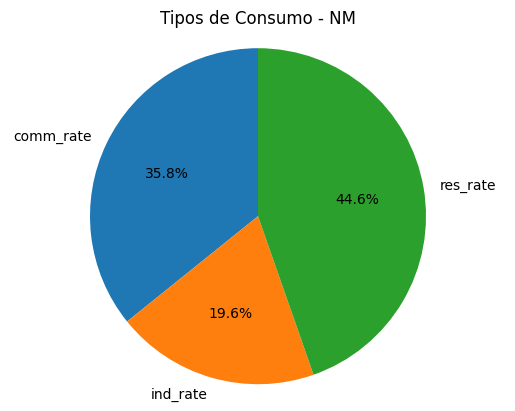

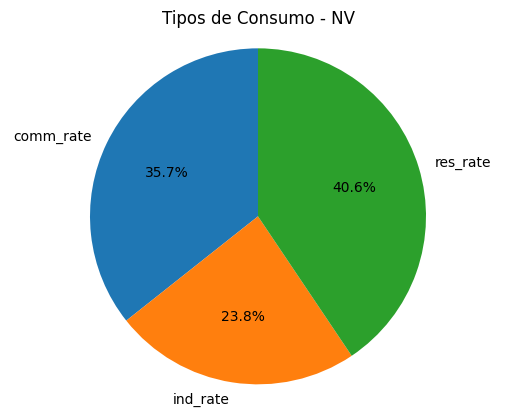

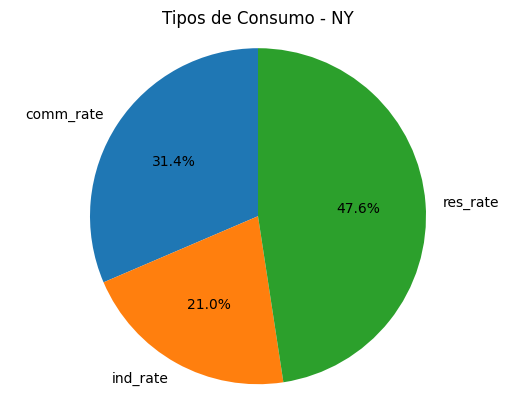

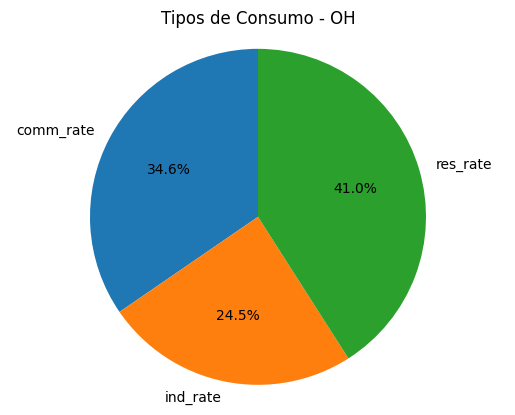

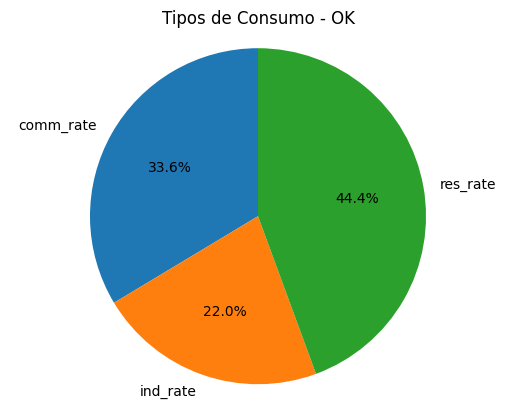

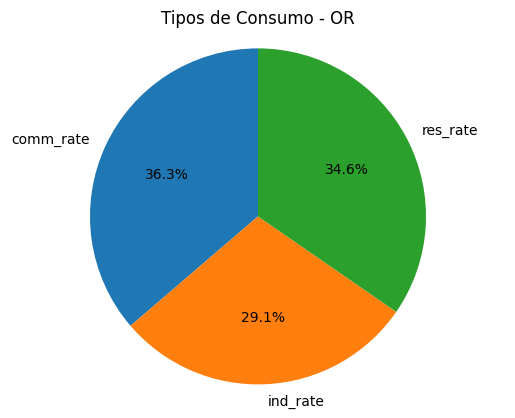

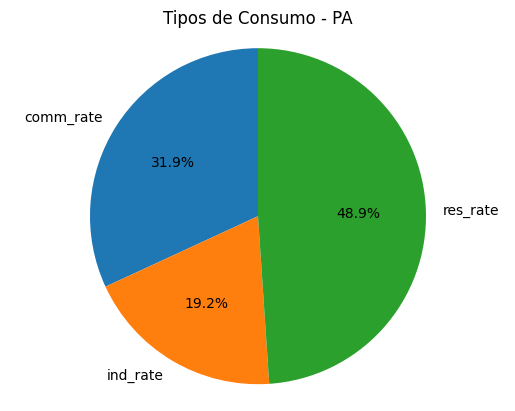

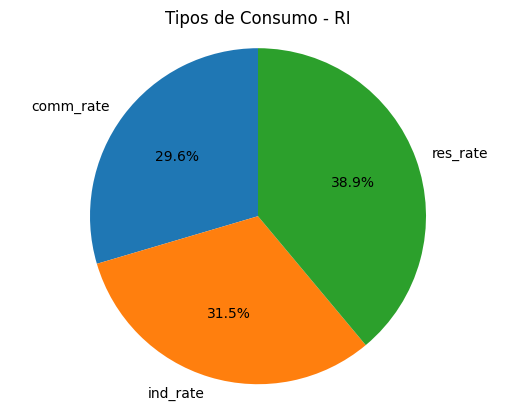

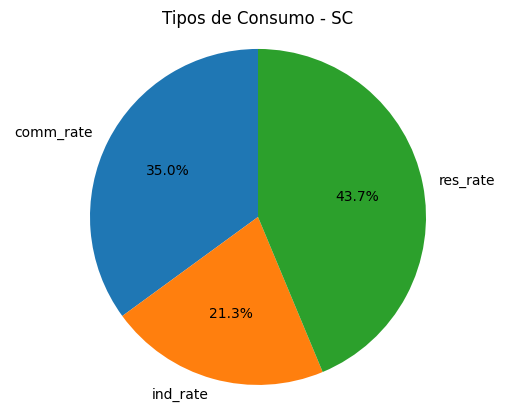

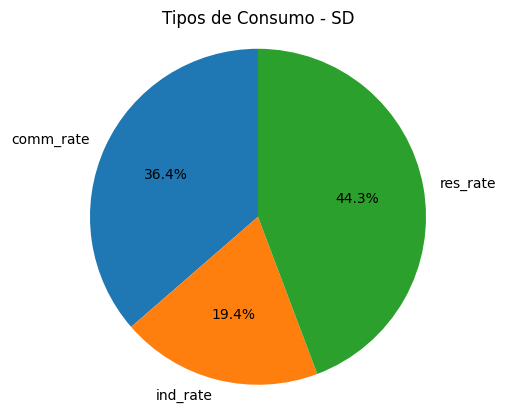

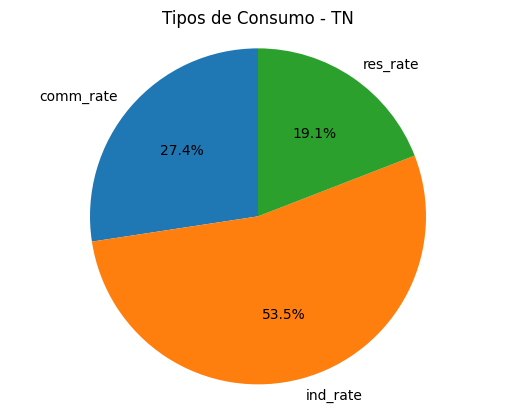

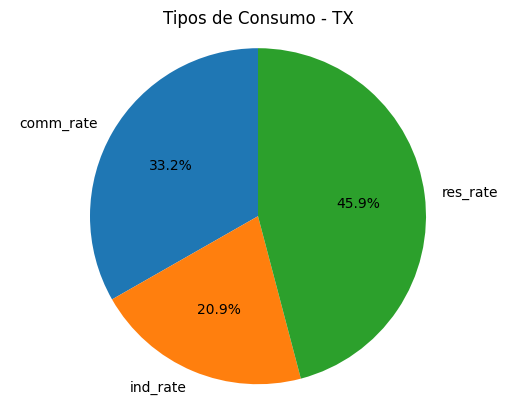

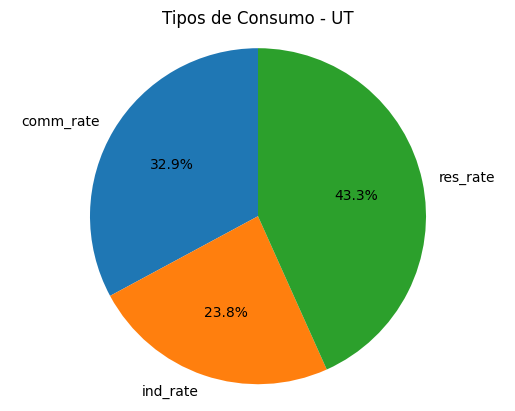

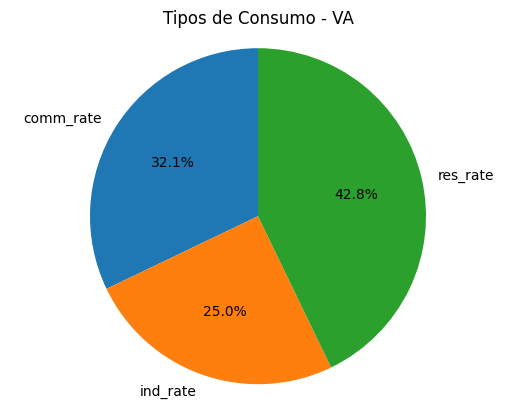

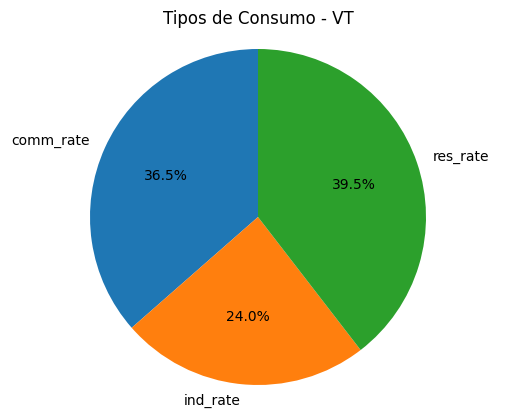

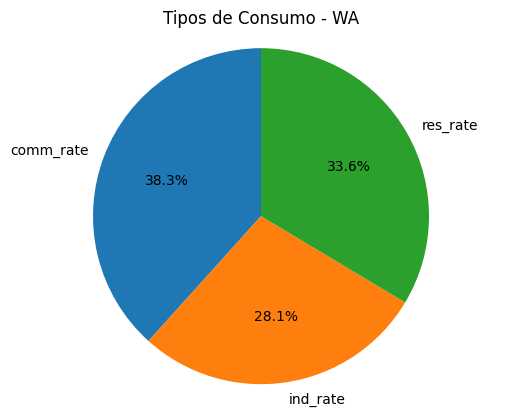

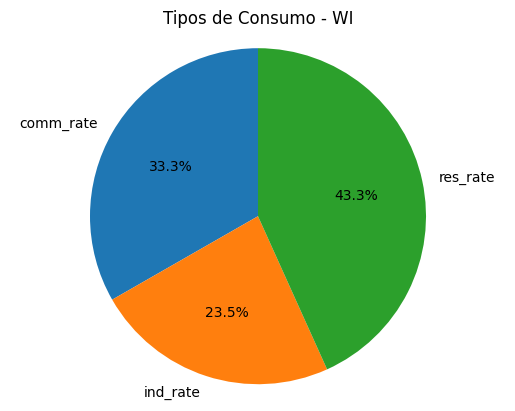

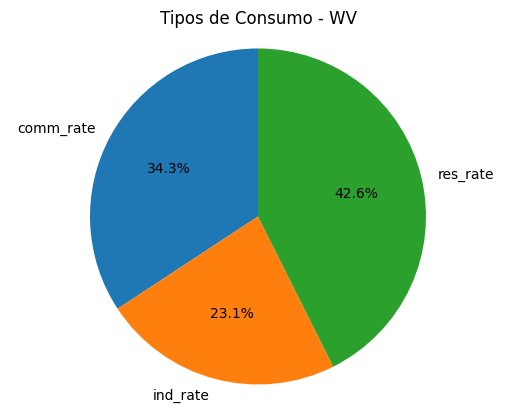

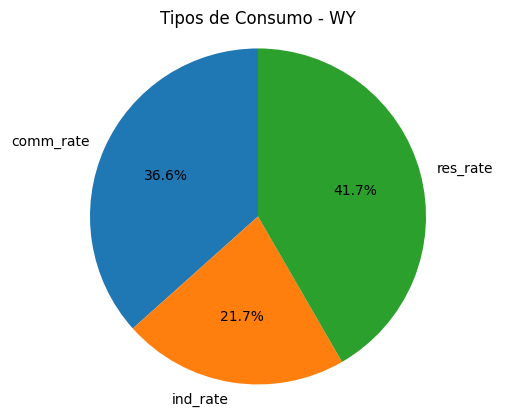

In [29]:

# Segmentação por estado e taxas de consumo
segmented_data = df.groupby('state')[['comm_rate', 'ind_rate', 'res_rate']].mean()

# Criar o diagrama circular para cada estado
for state in segmented_data.index:
    state_data = segmented_data.loc[state]
    labels = state_data.index
    sizes = state_data.values

    # Criar o diagrama circular
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Tipos de Consumo - {state}')

# Exibir os diagramas circulares
plt.show()
